In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
##from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values

import numpy as np                                                  # Importing package numpys (For Numerical Python)

import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline

from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation

from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model

import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

Importing Training Data from Local Machine

In [2]:
train_data = pd.read_csv(r"C:\Users\sumit.agarwal3\Documents\Data Science\Health insurance\train_data.csv")     # Importing data using pd.read_csv
train_data.head(5)

ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  \
0   1        C3         3213            Rented          Individual         36   
1   2        C5         1117             Owned               Joint         75   
2   3        C5         3732             Owned          Individual         32   
3   4       C24         4378             Owned               Joint         52   
4   5        C8         2190            Rented          Individual         44   

   Lower_Age Is_Spouse Health Indicator Holding_Policy_Duration  \
0         36        No               X1                     14+   
1         22        No               X2                     NaN   
2         32        No              NaN                       1   
3         48        No               X1                     14+   
4         44        No               X2                       3   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  Response  
0              3.00000               22          11628.00000         0  
1                  NaN               22          30510.00000         0  
2              1.00000               19           7450.00000         1  
3              3.00000               19          17780.00000         0  
4              1.00000               16          10404.00000         0

Importing Test Data from Local Machine

In [53]:
test_data = pd.read_csv(r"C:\Users\sumit.agarwal3\Documents\Data Science\Health insurance\test_data.csv")     # Importing data using pd.read_csv
test_data.head(5)

ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  \
0  38001       C15          620            Rented               Joint   
1  38002        C3           28             Owned          Individual   
2  38003        C2          777             Owned          Individual   
3  38004        C8         2737             Owned               Joint   
4  38005        C1          863             Owned          Individual   

   Upper_Age  Lower_Age Is_Spouse Health Indicator Holding_Policy_Duration  \
0         65         29        No               X4                     NaN   
1         39         39        No               X4                       4   
2         33         33        No               X4                       1   
3         28         25       Yes              NaN                     NaN   
4         43         43        No               X2                       5   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  
0                  NaN               19          30768.00000  
1              2.00000               16          13618.00000  
2              2.00000                3           6740.00000  
3                  NaN                8           9135.00000  
4              4.00000               18          12760.00000

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       38000 non-null  int64  
 1   City_Code                38000 non-null  object 
 2   Region_Code              38000 non-null  int64  
 3   Accomodation_Type        38000 non-null  object 
 4   Reco_Insurance_Type      38000 non-null  object 
 5   Upper_Age                38000 non-null  int64  
 6   Lower_Age                38000 non-null  int64  
 7   Is_Spouse                38000 non-null  object 
 8   Health Indicator         29280 non-null  object 
 9   Holding_Policy_Duration  22919 non-null  object 
 10  Holding_Policy_Type      22919 non-null  float64
 11  Reco_Policy_Cat          38000 non-null  int64  
 12  Reco_Policy_Premium      38000 non-null  float64
 13  Response                 38000 non-null  int64  
dtypes: float64(2), int64(6

In [11]:
train_data['Health Indicator'].isnull().sum()

8720

Data Preparation via filling in the missing data and changing data types as required

In [12]:
def data_prep(df):
  #Imputing Discrete variables and fixing inconsistencies
  df['Health Indicator'] = np.where(df['Health Indicator'].isna(), df['Health Indicator'].mode(), df['Health Indicator'])
    
  df['Holding_Policy_Duration'].replace('14+','15', inplace=True)
  df['Holding_Policy_Duration'] = np.where(df['Holding_Policy_Duration'].isna(), df['Holding_Policy_Duration'].mode(), df['Holding_Policy_Duration'])
  df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].astype('int')

  df['Holding_Policy_Type'] = np.where(df['Holding_Policy_Type'].isna(), df['Holding_Policy_Type'].mode(), df['Holding_Policy_Type'])
  return df

In [13]:
train_data = data_prep(train_data)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       38000 non-null  int64  
 1   City_Code                38000 non-null  object 
 2   Region_Code              38000 non-null  int64  
 3   Accomodation_Type        38000 non-null  object 
 4   Reco_Insurance_Type      38000 non-null  object 
 5   Upper_Age                38000 non-null  int64  
 6   Lower_Age                38000 non-null  int64  
 7   Is_Spouse                38000 non-null  object 
 8   Health Indicator         38000 non-null  object 
 9   Holding_Policy_Duration  38000 non-null  int32  
 10  Holding_Policy_Type      38000 non-null  float64
 11  Reco_Policy_Cat          38000 non-null  int64  
 12  Reco_Policy_Premium      38000 non-null  float64
 13  Response                 38000 non-null  int64  
dtypes: float64(2), int32(1

Performing Chi Square Test

In [14]:
from scipy.stats.contingency import chi2_contingency

In [15]:
table_1 = pd.crosstab(train_data['Response'], train_data['Accomodation_Type'])
print(table_1)

Accomodation_Type  Owned  Rented
Response                        
0                  15787   13145
1                   4999    4069


In [16]:
table_2 = pd.crosstab(train_data['Response'], train_data['Reco_Insurance_Type'])
print(table_2)

Reco_Insurance_Type  Individual  Joint
Response                              
0                         23063   5869
1                          7151   1917


In [17]:
table_3 = pd.crosstab(train_data['Response'], train_data['Health Indicator'])
print(table_3)

Health Indicator     X1    X2    X3    X4   X5   X6  X7  X8  X9
Response                                                       
0                 13988  5919  3863  3258  993  738  98  42  33
1                  4411  1832  1182  1025  308  238  50  11  11


<AxesSubplot:>

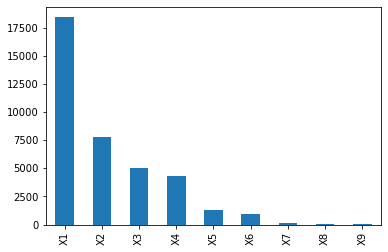

In [18]:
train_data['Health Indicator'].value_counts().plot(kind='bar')

In [19]:
table_4= pd.crosstab(train_data['Response'], train_data['Holding_Policy_Type'])
print(table_4)

Holding_Policy_Type  1.00000  2.00000  3.00000  4.00000
Response                                               
0                       4717     2861    19022     2332
1                       1467      878     5957      766


# Null Hypothesis: Accomodation_Type and Response is independent
# Alternate Hypothesis: Accomodation_Type and Response is dependent

In [20]:
def chi_sq_test(x, y):
  table = pd.crosstab(x,y)
  _,p,_,_ = chi2_contingency(table)
  if p < 0.05:
    print('Reject the Null Hypothesis at p: ', round(p,2))
  else:
    print('Failed to Reject the null hypothesis at p: ', round(p,2))
  return table

In [21]:
chi_sq_test(train_data['Response'], train_data['Accomodation_Type'])

Failed to Reject the null hypothesis at p:  0.35


Accomodation_Type  Owned  Rented
Response                        
0                  15787   13145
1                   4999    4069

In [22]:
chi_sq_test(train_data['Response'], train_data['Health Indicator'])

Failed to Reject the null hypothesis at p:  0.31


Health Indicator     X1    X2    X3    X4   X5   X6  X7  X8  X9
Response                                                       
0                 13988  5919  3863  3258  993  738  98  42  33
1                  4411  1832  1182  1025  308  238  50  11  11

In [23]:
chi_sq_test(train_data['Response'], train_data['Reco_Policy_Premium'])

Failed to Reject the null hypothesis at p:  0.97


Reco_Policy_Premium  2280.00000   2304.00000   2400.00000   2408.00000   \
Response                                                                  
0                              1            1            1            0   
1                              0            0            0            1   

Reco_Policy_Premium  2448.00000   2472.00000   2488.00000   2508.00000   \
Response                                                                  
0                              1            2            1            1   
1                              0            0            0            0   

Reco_Policy_Premium  2528.00000   2548.00000   2552.00000   2560.00000   \
Response                                                                  
0                              1            1            1            1   
1                              0            0            0            0   

Reco_Policy_Premium  2576.00000   2600.00000   2608.00000   2612.00000   \
Response                                                                  
0                              0            0            1            0   
1                              1            1            0            1   

Reco_Policy_Premium  2624.00000   2652.00000   2668.00000   2676.00000   \
Response                                                                  
0                              2            1            1            1   
1                              1            0            0            0   

Reco_Policy_Premium  2700.00000   2704.00000   2712.00000   2716.00000   \
Response                                                                  
0                              1            0            0            0   
1                              0            1            1            1   

Reco_Policy_Premium  2724.00000   2732.00000   2736.00000   2744.00000   \
Response                                                                  
0                              2            2            2            0   
1                              0            0            0            1   

Reco_Policy_Premium  2752.00000   2756.00000   2760.00000   2768.00000   \
Response                                                                  
0                              1            1            1            0   
1                              0            1            0            1   

Reco_Policy_Premium  2772.00000   2776.00000   2784.00000   2804.00000   \
Response                                                                  
0                              1            1            2            1   
1                              0            1            0            0   

Reco_Policy_Premium  2816.00000   2820.00000   2828.00000   2844.00000   \
Response                                                                  
0                              0            1            1            1   
1                              1            0            0            0   

Reco_Policy_Premium  2848.00000   2880.00000   2884.00000   2892.00000   \
Response                                                                  
0                              1            1            1            2   
1                              0            0            1            1   

Reco_Policy_Premium  2896.00000   2900.00000   2908.00000   2924.00000   \
Response                                                                  
0                              1            1            1            1   
1                              0            0            0            0   

Reco_Policy_Premium  2932.00000   2936.00000   2946.00000   2960.00000   \
Response                                                                  
0                              1            1            1            1   
1                              0            0            0            0   

Reco_Policy_Premium  2964.00000   2976.00000   2988.00000   2992.00000   \
Response    

## Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
def encode(df):
  le = LabelEncoder()
  df['Accomodation_Type'] = le.fit_transform(df['Accomodation_Type'])
  df['Reco_Insurance_Type'] = le.fit_transform(df['Reco_Insurance_Type'])
  df['City_Code'] = le.fit_transform(df['City_Code'])
  df['Is_Spouse'] = le.fit_transform(df['Is_Spouse'])
  df['Health Indicator'] = le.fit_transform(df['Health Indicator'])
  return df

In [28]:
train_data = encode(train_data)

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       38000 non-null  int64  
 1   City_Code                38000 non-null  int32  
 2   Region_Code              38000 non-null  int64  
 3   Accomodation_Type        38000 non-null  int32  
 4   Reco_Insurance_Type      38000 non-null  int32  
 5   Upper_Age                38000 non-null  int64  
 6   Lower_Age                38000 non-null  int64  
 7   Is_Spouse                38000 non-null  int32  
 8   Health Indicator         38000 non-null  int32  
 9   Holding_Policy_Duration  38000 non-null  int32  
 10  Holding_Policy_Type      38000 non-null  float64
 11  Reco_Policy_Cat          38000 non-null  int64  
 12  Reco_Policy_Premium      38000 non-null  float64
 13  Response                 38000 non-null  int64  
dtypes: float64(2), int32(6

In [32]:
x = train_data.iloc[:,1:13]
y = train_data['Response']

In [33]:
x.head()

City_Code  Region_Code  Accomodation_Type  Reco_Insurance_Type  Upper_Age  \
0         22         3213                  1                    0         36   
1         31         1117                  0                    1         75   
2         31         3732                  0                    0         32   
3         16         4378                  0                    1         52   
4         34         2190                  1                    0         44   

   Lower_Age  Is_Spouse  Health Indicator  Holding_Policy_Duration  \
0         36          0                 0                       15   
1         22          0                 1                        1   
2         32          0                 0                        1   
3         48          0                 0                       15   
4         44          0                 1                        3   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  
0              3.00000               22          11628.00000  
1              3.00000               22          30510.00000  
2              1.00000               19           7450.00000  
3              3.00000               19          17780.00000  
4              1.00000               16          10404.00000

In [34]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

Splitting Test and Train Data

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30400, 12)
(7600, 12)
(30400,)
(7600,)


Implementing Decision Tree Alogorithm

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [39]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split =5)
dtree.fit(x_train, y_train)
preds_dtree_train = dtree.predict(x_train)
preds_dtree_test = dtree.predict(x_test)

Model Evaluation

In [40]:
def model_eval(actual, predicted):
  conf_mat = confusion_matrix(actual, predicted)
  acc_score = accuracy_score(actual, predicted)
  clasrep = classification_report(actual, predicted)
  print('Model Accuracy is : ', acc_score)
  print(conf_mat)
  print(clasrep)

In [41]:
model_eval(y_train,preds_dtree_train)

Model Accuracy is :  0.7616776315789474
[[23154     0]
 [ 7245     1]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     23154
           1       1.00      0.00      0.00      7246

    accuracy                           0.76     30400
   macro avg       0.88      0.50      0.43     30400
weighted avg       0.82      0.76      0.66     30400



In [42]:
model_eval(y_test, preds_dtree_test)

Model Accuracy is :  0.7602631578947369
[[5778    0]
 [1822    0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      5778
           1       0.00      0.00      0.00      1822

    accuracy                           0.76      7600
   macro avg       0.38      0.50      0.43      7600
weighted avg       0.58      0.76      0.66      7600



In [43]:
dtree.feature_importances_

array([0.04464382, 0.02445413, 0.        , 0.        , 0.00202498,
       0.        , 0.        , 0.        , 0.00458288, 0.        ,
       0.91154524, 0.01274894])

Understanding Test Data

In [44]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12882 entries, 0 to 12881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       12882 non-null  int64  
 1   City_Code                12882 non-null  object 
 2   Region_Code              12882 non-null  int64  
 3   Accomodation_Type        12882 non-null  object 
 4   Reco_Insurance_Type      12882 non-null  object 
 5   Upper_Age                12882 non-null  int64  
 6   Lower_Age                12882 non-null  int64  
 7   Is_Spouse                12882 non-null  object 
 8   Health Indicator         9911 non-null   object 
 9   Holding_Policy_Duration  7712 non-null   object 
 10  Holding_Policy_Type      7712 non-null   float64
 11  Reco_Policy_Cat          12882 non-null  int64  
 12  Reco_Policy_Premium      12882 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 1.3+ MB


In [56]:
test_data = data_prep(test_data)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12882 entries, 0 to 12881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       12882 non-null  int64  
 1   City_Code                12882 non-null  object 
 2   Region_Code              12882 non-null  int64  
 3   Accomodation_Type        12882 non-null  object 
 4   Reco_Insurance_Type      12882 non-null  object 
 5   Upper_Age                12882 non-null  int64  
 6   Lower_Age                12882 non-null  int64  
 7   Is_Spouse                12882 non-null  object 
 8   Health Indicator         12882 non-null  object 
 9   Holding_Policy_Duration  12882 non-null  int32  
 10  Holding_Policy_Type      12882 non-null  float64
 11  Reco_Policy_Cat          12882 non-null  int64  
 12  Reco_Policy_Premium      12882 non-null  float64
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 1.2+ MB


In [57]:
test_data - encode(test_data)
test_data.head()

ID  City_Code  Region_Code  Accomodation_Type  Reco_Insurance_Type  \
0  38001          6          620                  1                    1   
1  38002         22           28                  0                    0   
2  38003         11          777                  0                    0   
3  38004         34         2737                  0                    1   
4  38005          0          863                  0                    0   

   Upper_Age  Lower_Age  Is_Spouse  Health Indicator  Holding_Policy_Duration  \
0         65         29          0                 3                        1   
1         39         39          0                 3                        4   
2         33         33          0                 3                        1   
3         28         25          1                 0                        1   
4         43         43          0                 1                        5   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  
0              3.00000               19          30768.00000  
1              2.00000               16          13618.00000  
2              2.00000                3           6740.00000  
3              3.00000                8           9135.00000  
4              4.00000               18          12760.00000

In [58]:
test_data_ = test_data.iloc[:,1:13]

In [59]:
preds_dtree_test_sample = dtree.predict(test_data_)

In [60]:
df11 = pd.DataFrame(preds_dtree_test_sample)
df11

0
0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
111    0
112    0
113    0
114    0
115    0
116    0
117    0
118    0
119    0
120    0
121    0
122    0
123    0
124    0
125    0
126    0
127    0
128    0
129    0
130    0
131    0
132    0
133    0
134    0
135    0
136    0
137    0
138    0
139    0
140    0
141    0
142    0
143    0
144    0
145    0
146    0
147    0
148    0
149    0
150    0
151    0
152    0
153    0
154    0
155    0
156    0
157    0
158    0
159    0
160    0
161    0
162    0
163    0
164    0
165    0
166    0
167    0
168    0
169    0
170    0
171    0
172    0
173    0
174    0
175    0
176    0
177    0
178    0
179    0
180    0
181    0
182    0
183    0
184    0
185    0
186    0
187    0
188    0
189    0
190    0
191    0
192    0
193    0
194    0
195    0
196    0
197    0
198    0
199    0
200    0
201    0
202    0
203    0
204    0
205    0
206    0
207    0
208    0
209    0
210    0
211    0
212    0
213    0
214    0
215    0
216    0
217    0
218    0
219    0
220    0
221    0
222    0
223    0
224    0
225    0
226    0
227    0
228    0
229    0
230    0
231    0
232    0
233    0
234    0
235    0
236    0
237    0
238    0
239    0
240    0
241    0
242    0
243    0
244    0
245    0
246    0
247    0
248    0
249    0
250    0
251    0
252    0
253    0
254    0
255    0
256    0
257    0
258    0
259    0
260    0
261    0
262    0
263    0
264    0
265    0
266    0
267    0
268    0
269    0
270    0
271    0
272    0
273    0
274    0
275    0
276    0
277    0
278    0
279    0
280    0
281    0
282    0
283    0
284    0
285    0
286    0
287    0
288    0
289    0
290    0
291    0
292    0
293    0
294    0
295    0
296    0
297    0
298    0
299    0
300    0
301    0
302    0
303    0
304    0
305    0
306    0
307    0
308    0
309    0
310    0
311    0
312    0
313    0
314    0
315    0
316    0
317    0
318    0
319    0
320    0
321    0
322    0
323    0
324    0
325    0
326    0
327    0
328    0
329    0
330    0
331    0
332    0
333    0
334    0
335    0
336    0
337    0
338    0
339    0
340    0
341    0
342    0
343    0
344    0
345    0
346    0
347    0
348    0
349    0
350    0
351    0
352    0
353    0
354    0
355    0
356    0
357    0
358    0
359    0
360    0
361    0
362    0
363    0
364    0
365    0
366    0
367    0
368    0
369    0
370    0
371    0
372    0
373    0
374    0
375    0
376    0
377    0
378    0
379    0
380    0
381    0
382    0
383    0
384    0
385    0
386    0
387    0
388    0
389    0
390    0
391    0
392    0
393    0
394    0
395    0
396    0
397    0
398    0
399    0
400    0
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
44

In [61]:
df11['ID'] = test_data['ID']
df11

0     ID
0      0  38001
1      0  38002
2      0  38003
3      0  38004
4      0  38005
5      0  38006
6      0  38007
7      0  38008
8      0  38009
9      0  38010
10     0  38011
11     0  38012
12     0  38013
13     0  38014
14     0  38015
15     0  38016
16     0  38017
17     0  38018
18     0  38019
19     0  38020
20     0  38021
21     0  38022
22     0  38023
23     0  38024
24     0  38025
25     0  38026
26     0  38027
27     0  38028
28     0  38029
29     0  38030
30     0  38031
31     0  38032
32     0  38033
33     0  38034
34     0  38035
35     0  38036
36     0  38037
37     0  38038
38     0  38039
39     0  38040
40     0  38041
41     0  38042
42     0  38043
43     0  38044
44     0  38045
45     0  38046
46     0  38047
47     0  38048
48     0  38049
49     0  38050
50     0  38051
51     0  38052
52     0  38053
53     0  38054
54     0  38055
55     0  38056
56     0  38057
57     0  38058
58     0  38059
59     0  38060
60     0  38061
61     0  38062
62     0  38063
63     0  38064
64     0  38065
65     0  38066
66     0  38067
67     0  38068
68     0  38069
69     0  38070
70     0  38071
71     0  38072
72     0  38073
73     0  38074
74     0  38075
75     0  38076
76     0  38077
77     0  38078
78     0  38079
79     0  38080
80     0  38081
81     0  38082
82     0  38083
83     0  38084
84     0  38085
85     0  38086
86     0  38087
87     0  38088
88     0  38089
89     0  38090
90     0  38091
91     0  38092
92     0  38093
93     0  38094
94     0  38095
95     0  38096
96     0  38097
97     0  38098
98     0  38099
99     0  38100
100    0  38101
101    0  38102
102    0  38103
103    0  38104
104    0  38105
105    0  38106
106    0  38107
107    0  38108
108    0  38109
109    0  38110
110    0  38111
111    0  38112
112    0  38113
113    0  38114
114    0  38115
115    0  38116
116    0  38117
117    0  38118
118    0  38119
119    0  38120
120    0  38121
121    0  38122
122    0  38123
123    0  38124
124    0  38125
125    0  38126
126    0  38127
127    0  38128
128    0  38129
129    0  38130
130    0  38131
131    0  38132
132    0  38133
133    0  38134
134    0  38135
135    0  38136
136    0  38137
137    0  38138
138    0  38139
139    0  38140
140    0  38141
141    0  38142
142    0  38143
143    0  38144
144    0  38145
145    0  38146
146    0  38147
147    0  38148
148    0  38149
149    0  38150
150    0  38151
151    0  38152
152    0  38153
153    0  38154
154    0  38155
155    0  38156
156    0  38157
157    0  38158
158    0  38159
159    0  38160
160    0  38161
161    0  38162
162    0  38163
163    0  38164
164    0  38165
165    0  38166
166    0  38167
167    0  38168
168    0  38169
169    0  38170
170    0  38171
171    0  38172
172    0  38173
173    0  38174
174    0  38175
175    0  38176
176    0  38177
177    0  38178
178    0  38179
179    0  38180
180    0  38181
181    0  38182
182    0  38183
183    0  38184
184    0  38185
185    0  38186
186    0  38187
187    0  38188
188    0  38189
189    0  38190
190    0  38191
191    0  38192
192    0  38193
193    0  38194
194    0  38195
195    0  38196
196    0  38197
197    0  38198
198    0  38199
199    0  38200
200    0  38201
201    0  38202
202    0  38203
203    0  38204
204    0  38205
205    0  38206
206    0  38207
207    0  38208
208    0  38209
209    0  38210
210    0  38211
211    0  38212
212    0  38213
213    0  38214
214    0  38215
215    0  38216
216    0  38217
217    0  38218
218    0  38219
219    0  38220
220    0  38221
221    0  38222
222    0  38223
223    0  38224
224    0  38225
225    0  38226
226    0  38227
227    0  38228
228    0  38229
229    0  38230
230    0  38231
231    0  38232
232    0  38233
233    0  38234
234    0  38235
235    0  38236
236    0  38237
237    0  38238
238    0  38239
239    0  38240
240    0  38241
241    0  38242
242    0  38243
243    0  38244
244    0  38245
245    0  38246
246    0  38247
247    0  38248
248    0  38249
249    

Generating Submission File

In [67]:

df11.to_csv(r'C:\Users\sumit.agarwal3\Documents\Data Science\Health insurance\submission.csv', encoding='utf-8', index=False, header=False)